# LOAD package

In [2]:
# from astropy import table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,hstack,vstack
from astropy.io import fits

In [3]:
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
from scipy.spatial import cKDTree
import astropy.units as u

# load decals catalogue

In [3]:
decals = Table.read("/home/kunxu/DECaLS/spec/spec_decals.fits")
bass = Table.read("/home/kunxu/DECaLS/spec/spec_bass.fits")

In [4]:
decals    #3558075

RELEASE,BRICKID,BRICKNAME,OBJID,BRICK_PRIMARY,MASKBITS,FITBITS,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],APFLUX_MASKED_G [8],APFLUX_MASKED_R [8],APFLUX_MASKED_Z [8],APFLUX_W1 [5],APFLUX_W2 [5],APFLUX_W3 [5],APFLUX_W4 [5],APFLUX_RESID_W1 [5],APFLUX_RESID_W2 [5],APFLUX_RESID_W3 [5],APFLUX_RESID_W4 [5],APFLUX_IVAR_W1 [5],APFLUX_IVAR_W2 [5],APFLUX_IVAR_W3 [5],APFLUX_IVAR_W4 [5],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,NEA_G,NEA_R,NEA_Z,BLOB_NEA_G,BLOB_NEA_R,BLOB_NEA_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,WISE_X,WISE_Y,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_FRACFLUX_W1 [15],LC_FRACFLUX_W2 [15],LC_RCHISQ_W1 [15],LC_RCHISQ_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],LC_EPOCH_INDEX_W1 [15],LC_EPOCH_INDEX_W2 [15],SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,MJD,PLATE,FIBERID,RUN2D,SURVEY,Z
,,,,,,,,deg,deg,1/deg^2,1/deg^2,,,,mag,,,,,mas / yr,mas / yr,mas,1/(mas/yr)^2,1/(mas/yr)^2,1/mas^2,,mag,,,mag,,,mag,,,,,,,,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,arcsec,1/arcsec^2,,,,,,,,,,
int16,int32,bytes8,int32,bool,int16,int16,bytes3,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,flo

In [5]:
bass    #2156870

RELEASE,BRICKID,BRICKNAME,OBJID,BRICK_PRIMARY,MASKBITS,FITBITS,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],APFLUX_MASKED_G [8],APFLUX_MASKED_R [8],APFLUX_MASKED_Z [8],APFLUX_W1 [5],APFLUX_W2 [5],APFLUX_W3 [5],APFLUX_W4 [5],APFLUX_RESID_W1 [5],APFLUX_RESID_W2 [5],APFLUX_RESID_W3 [5],APFLUX_RESID_W4 [5],APFLUX_IVAR_W1 [5],APFLUX_IVAR_W2 [5],APFLUX_IVAR_W3 [5],APFLUX_IVAR_W4 [5],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,NEA_G,NEA_R,NEA_Z,BLOB_NEA_G,BLOB_NEA_R,BLOB_NEA_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,WISE_X,WISE_Y,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_FRACFLUX_W1 [15],LC_FRACFLUX_W2 [15],LC_RCHISQ_W1 [15],LC_RCHISQ_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],LC_EPOCH_INDEX_W1 [15],LC_EPOCH_INDEX_W2 [15],SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,MJD,PLATE,FIBERID,RUN2D,SURVEY,Z
,,,,,,,,deg,deg,1/deg^2,1/deg^2,,,,mag,,,,,mas / yr,mas / yr,mas,1/(mas/yr)^2,1/(mas/yr)^2,1/mas^2,,mag,,,mag,,,mag,,,,,,,,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,arcsec,1/arcsec^2,,,,,,,,,,
int16,int32,bytes8,int32,bool,int16,int16,bytes3,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,flo

In [8]:
dec_cut = decals['RA','DEC','Z']
bass_cut = bass['RA','DEC','Z']
All = vstack((dec_cut,bass_cut))

In [9]:
All

RA,DEC,Z
deg,deg,
float64,float64,float32
146.7142089718074,-1.0412844545329816,0.021275453
146.91943880835558,-0.9905002097615121,0.21392463
146.90228169572464,-0.9849207185450679,0.65218145
146.85983422140268,-0.8089103451601436,0.12655362
146.7633686243738,-0.8104302420145392,0.44864488
146.96394273613265,-0.5450604932677102,0.055987872
146.6072250353195,-1.2407778869597124,0.09063296
146.9386205486588,-0.6870093697327215,2.8305912


## redshift cut

In [14]:
index = ((All['Z']<=0.5)&(All['Z']>=0.2))
zcut = All[index]   #995853

In [15]:
zcut

RA,DEC,Z
deg,deg,
float64,float64,float32
146.91943880835558,-0.9905002097615121,0.21392463
146.7633686243738,-0.8104302420145392,0.44864488
146.74413804985173,-0.6522281270084387,0.2037688
146.62279529417,-0.9513646568090304,0.37124884
146.9240501998721,-0.10518423290794353,0.32764107
147.02336560206018,-0.16014586262907335,0.21564895
146.91080785877224,-0.07460542595771787,0.24227172
147.11459216124067,-0.16522932689381256,0.20423692


In [17]:
pwd

'/home/yunzheng/PAC/code/low_new'

In [16]:
Table(zcut).write("./decals_bass_2_5_zcut.fits")

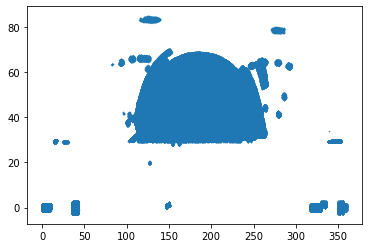

In [11]:
plt.scatter(bass['RA'],bass['DEC'],s =0.1)

# topcat match lowz&hsc

- /home/yunzheng/PAC/code/lowz_new/decals_bass_2_5_zcut.fits
- /home/yunzheng/PAC/code/hsc_SEDfitting/hsc_band.fits

=> lowz_hsc_band.fits

In [4]:
match = Table.read("./lowz_hsc_band.fits")

In [20]:
match     #43920

RA_1,DEC_1,Z,id,subaru.hsc.g,subaru.hsc.g_err,subaru.hsc.r,subaru.hsc.r_err,subaru.hsc.i,subaru.hsc.i_err,subaru.hsc.z,subaru.hsc.z_err,subaru.hsc.y,subaru.hsc.y_err,ra_2,dec_2,skymap_id,Separation
deg,deg,,,,,,,,,,,,,,,,arcsec
float64,float64,float32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64
146.91943880835558,-0.9905002097615121,0.21392463,49095779,0.06618110835552216,8.752569556236267e-05,0.19749975204467773,0.00014078617095947266,0.32324159145355225,0.0001232624053955078,0.4191005825996399,0.00019828975200653076,0.49881651997566223,0.00040158629417419434,146.91945951679537,-0.9904975367316553,93250303,0.07515782845442948
146.7633686243738,-0.8104302420145392,0.44864488,49107329,0.012241519056260586,3.831367939710617e-05,0.05465439707040787,6.412714719772339e-05,0.11369573324918747,7.997080683708191e-05,0.15171360969543457,0.00018126517534255981,0.18941082060337067,0.00030547380447387695,146.76337052530354,-0.8104276854141249,93250304,0.011468707637153039
146.62279529417,-0.9513646568090304,0.37124884,49190370,0.03540857881307602,6.836559623479843e-05,0.15333802998065948,0.0001566857099533081,0.2695724368095398,0.00010345876216888428,0.3534099757671356,0.00019723176956176758,0.4216761291027069,0.0004247725009918213,146.62280014534682,-0.9513623461346574,93250403,0.01934196767445425
146.9240501998721,-0.10518423290794353,0.32764107,49143425,0.02177237905561924,4.086550325155258e-05,0.08943422883749008,6.74128532409668e-05,0.1601584255695343,7.409602403640747e-05,0.21408087015151978,0.00014771521091461182,0.2580620050430298,0.00026123225688934326,146.9240620540112,-0.10518239313111284,93250307,0.043185735397086936
147.02336560206018,-0.16014586262907335,0.21564895,49054815,0.043048955500125885,7.552839815616608e-05,0.13371339440345764,0.00011675804853439331,0.23438730835914612,0.0001058727502822876,0.3037906885147095,0.0002155303955078125,0.3668104410171509,0.0004046112298965454,147.02338806553786,-0.1601309593311747,93250207,0.09704735849548854
146.91080785877224,-0.07460542595771787,0.24227172,49146993,0.0489482656121254,6.01988285779953e-05,0.1715400218963623,0.00010561197996139526,0.2712445855140686,9.303539991378784e-05,0.35945379734039307,0.000171661376953125,0.45937418937683105,0.00032679736614227295,146.91082165689446,-0.07459577336616721,93250308,0.06062130393622935
147.11459216124067,-0.16522932689381256,0.20423692,49054364,0.12134144455194473,9.979307651519775e-05,0.3570292890071869,0.00016038119792938232,0.5689717531204224,0.00013899803161621094,0.7325602769851685,0.000255584716796875,0.8679747581481934,0.00044721364974975586,147.11459717104816,-0.16522499096027118,93250207,0.02385208034615464
147.0896972156587,-0.26649303833152727,0.3834088,49051084,0.021191809326410294,5.1087234169244766e-05,0.09915769845247269,8.166581392288208e-05,0.1856275498867035,0.0001128464937210083,0.2476775050163269,0.0002051517367362976,0.2941305935382843,0.00043092668056488037,147.0897033749402,-0.2664923379423015,93250207,0.022316072414810484


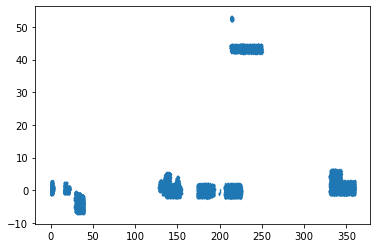

In [21]:
plt.scatter(match['RA_1'],match['DEC_1'],s =0.1)

In [22]:
np.min(match['Z'])

0.20002466

In [23]:
np.max(match['Z'])

0.49999672

# 存SED输入文件

In [24]:
ID = np.array(range(len(match)))

In [25]:
ID

array([    0,     1,     2, ..., 43917, 43918, 43919])

In [26]:
target = Table()
target.add_column(Column(name = 'id',length = len(match),dtype = 'int64',data = ID))

In [27]:
tar2 = match['Z','subaru.hsc.g','subaru.hsc.g_err','subaru.hsc.r','subaru.hsc.r_err','subaru.hsc.i','subaru.hsc.i_err','subaru.hsc.z','subaru.hsc.z_err','subaru.hsc.y','subaru.hsc.y_err']

In [28]:
tar2['Z'].name = 'redshift'

In [29]:
spec= hstack((target,tar2))

In [30]:
spec   #43920

id,redshift,subaru.hsc.g,subaru.hsc.g_err,subaru.hsc.r,subaru.hsc.r_err,subaru.hsc.i,subaru.hsc.i_err,subaru.hsc.z,subaru.hsc.z_err,subaru.hsc.y,subaru.hsc.y_err
int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.21392463,0.06618110835552216,8.752569556236267e-05,0.19749975204467773,0.00014078617095947266,0.32324159145355225,0.0001232624053955078,0.4191005825996399,0.00019828975200653076,0.49881651997566223,0.00040158629417419434
1,0.44864488,0.012241519056260586,3.831367939710617e-05,0.05465439707040787,6.412714719772339e-05,0.11369573324918747,7.997080683708191e-05,0.15171360969543457,0.00018126517534255981,0.18941082060337067,0.00030547380447387695
2,0.37124884,0.03540857881307602,6.836559623479843e-05,0.15333802998065948,0.0001566857099533081,0.2695724368095398,0.00010345876216888428,0.3534099757671356,0.00019723176956176758,0.4216761291027069,0.0004247725009918213
3,0.32764107,0.02177237905561924,4.086550325155258e-05,0.08943422883749008,6.74128532409668e-05,0.1601584255695343,7.409602403640747e-05,0.21408087015151978,0.00014771521091461182,0.2580620050430298,0.00026123225688934326
4,0.21564895,0.043048955500125885,7.552839815616608e-05,0.13371339440345764,0.00011675804853439331,0.23438730835914612,0.0001058727502822876,0.3037906885147095,0.0002155303955078125,0.3668104410171509,0.0004046112298965454
5,0.24227172,0.0489482656121254,6.01988285779953e-05,0.1715400218963623,0.00010561197996139526,0.2712445855140686,9.303539991378784e-05,0.35945379734039307,0.000171661376953125,0.45937418937683105,0.00032679736614227295
6,0.20423692,0.12134144455194473,9.979307651519775e-05,0.3570292890071869,0.00016038119792938232,0.5689717531204224,0.00013899803161621094,0.7325602769851685,0.000255584716796875,0.8679747581481934,0.00044721364974975586
7,0.3834088,0.021191809326410294,5.1087234169244766e-05,0.09915769845247269,8.166581392288208e-05,0.1856275498867035,0.0001128464937210083,0.2476775050163269,0.0002051517367362976,0.2941305935382843,0.00043092668056488037
8,0.20591073,0.08669156581163406,7.050111889839172e-05,0.266326904296875,0.00012862682342529297,0.42045748233795166,9.907782077789307e-05,0.5465704202651978,0.00019297003746032715,0.6540212035179138,0.0003103315830230713


In [32]:
Table(spec).write("./lowz_sed_input.fits")

In [33]:
spec[(spec['redshift']<=0.4)&(spec['redshift']>=0.2)]

id,redshift,subaru.hsc.g,subaru.hsc.g_err,subaru.hsc.r,subaru.hsc.r_err,subaru.hsc.i,subaru.hsc.i_err,subaru.hsc.z,subaru.hsc.z_err,subaru.hsc.y,subaru.hsc.y_err
int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.21392463,0.06618110835552216,8.752569556236267e-05,0.19749975204467773,0.00014078617095947266,0.32324159145355225,0.0001232624053955078,0.4191005825996399,0.00019828975200653076,0.49881651997566223,0.00040158629417419434
2,0.37124884,0.03540857881307602,6.836559623479843e-05,0.15333802998065948,0.0001566857099533081,0.2695724368095398,0.00010345876216888428,0.3534099757671356,0.00019723176956176758,0.4216761291027069,0.0004247725009918213
3,0.32764107,0.02177237905561924,4.086550325155258e-05,0.08943422883749008,6.74128532409668e-05,0.1601584255695343,7.409602403640747e-05,0.21408087015151978,0.00014771521091461182,0.2580620050430298,0.00026123225688934326
4,0.21564895,0.043048955500125885,7.552839815616608e-05,0.13371339440345764,0.00011675804853439331,0.23438730835914612,0.0001058727502822876,0.3037906885147095,0.0002155303955078125,0.3668104410171509,0.0004046112298965454
5,0.24227172,0.0489482656121254,6.01988285779953e-05,0.1715400218963623,0.00010561197996139526,0.2712445855140686,9.303539991378784e-05,0.35945379734039307,0.000171661376953125,0.45937418937683105,0.00032679736614227295
6,0.20423692,0.12134144455194473,9.979307651519775e-05,0.3570292890071869,0.00016038119792938232,0.5689717531204224,0.00013899803161621094,0.7325602769851685,0.000255584716796875,0.8679747581481934,0.00044721364974975586
7,0.3834088,0.021191809326410294,5.1087234169244766e-05,0.09915769845247269,8.166581392288208e-05,0.1856275498867035,0.0001128464937210083,0.2476775050163269,0.0002051517367362976,0.2941305935382843,0.00043092668056488037
8,0.20591073,0.08669156581163406,7.050111889839172e-05,0.266326904296875,0.00012862682342529297,0.42045748233795166,9.907782077789307e-05,0.5465704202651978,0.00019297003746032715,0.6540212035179138,0.0003103315830230713
9,0.37091246,0.013950580731034279,4.738150164484978e-05,0.06670958548784256,6.747432053089142e-05,0.12281692028045654,8.425116539001465e-05,0.16656814515590668,0.00019210577011108398,0.20317348837852478,0.0004120245575904846


# SED result

In [5]:
out = Table.read("./SED/out/results.fits")

In [6]:
out    #43920

id,bayes.param.restframe_Lnu(DECam.g),bayes.param.restframe_Lnu(DECam.g)_err,bayes.param.restframe_Lnu(DECam.r),bayes.param.restframe_Lnu(DECam.r)_err,bayes.param.restframe_Lnu(sdss.gp),bayes.param.restframe_Lnu(sdss.gp)_err,bayes.param.restframe_Lnu(sdss.rp),bayes.param.restframe_Lnu(sdss.rp)_err,bayes.param.restframe_Lnu(sdss.up),bayes.param.restframe_Lnu(sdss.up)_err,bayes.param.restframe_Lnu(subaru.hsc.g),bayes.param.restframe_Lnu(subaru.hsc.g)_err,bayes.param.restframe_Lnu(subaru.hsc.r),bayes.param.restframe_Lnu(subaru.hsc.r)_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.param.restframe_DECam.g-DECam.r,best.param.restframe_sdss.gp-sdss.rp,best.param.restframe_sdss.up-sdss.rp,best.param.restframe_subaru.hsc.g-subaru.hsc.r,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(DECam.g),best.param.restframe_Lnu(DECam.r),best.param.restframe_Lnu(sdss.gp),best.param.restframe_Lnu(sdss.rp),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.r),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.subaru.hsc.g,best.subaru.hsc.r,best.subaru.hsc.i,best.subaru.hsc.z,best.subaru.hsc.y
,W,W,W,W,W,W,W,W,W,W,W,W,W,W,solMass,solMass,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,mag,mag,mag,mag,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1.7710001664150777e+22,8.855000832075389e+20,3.6118404007528564e+22,1.8059202003764283e+21,1.6320254949649906e+22,8.160127474824953e+20,3.3807442462846155e+22,1.690372123142308e+21,3.5154067322885673e+21,4.145966944098673e+20,1.74319792741007

In [100]:
out.columns

<TableColumns names=('id','bayes.param.restframe_Lnu(DECam.g)','bayes.param.restframe_Lnu(DECam.g)_err','bayes.param.restframe_Lnu(DECam.r)','bayes.param.restframe_Lnu(DECam.r)_err','bayes.param.restframe_Lnu(sdss.gp)','bayes.param.restframe_Lnu(sdss.gp)_err','bayes.param.restframe_Lnu(sdss.rp)','bayes.param.restframe_Lnu(sdss.rp)_err','bayes.param.restframe_Lnu(sdss.up)','bayes.param.restframe_Lnu(sdss.up)_err','bayes.param.restframe_Lnu(subaru.hsc.g)','bayes.param.restframe_Lnu(subaru.hsc.g)_err','bayes.param.restframe_Lnu(subaru.hsc.r)','bayes.param.restframe_Lnu(subaru.hsc.r)_err','bayes.stellar.m_star','bayes.stellar.m_star_err','bayes.subaru.hsc.g','bayes.subaru.hsc.g_err','bayes.subaru.hsc.r','bayes.subaru.hsc.r_err','best.chi_square','best.reduced_chi_square','best.attenuation.E_BVs.nebular.continuum_old','best.attenuation.E_BVs.nebular.continuum_young','best.attenuation.E_BVs.nebular.lines_old','best.attenuation.E_BVs.nebular.lines_young','best.attenuation.E_BVs.stellar.old','

In [8]:
All = hstack((out,match))

In [9]:
# out_final = All['ra_2','dec_2','Z','best.stellar.m_star','skymap_id']
out_final = All['ra_2','dec_2','Z','bayes.stellar.m_star','skymap_id']

out_final['ra_2'].name = 'ra'
out_final['dec_2'].name = 'dec'
out_final['bayes.stellar.m_star'].name = 'mass'
# out_final['best.stellar.m_star'].name = 'mass'


out_final['mass'] = np.log10(out_final['mass'])

In [10]:
out_final    #43920

ra,dec,Z,mass,skymap_id
,,,solMass,
float64,float64,float32,float64,int32
146.91945951679537,-0.9904975367316553,0.21392463,10.949968184185265,93250303
146.76337052530354,-0.8104276854141249,0.44864488,11.289241446204112,93250304
146.62280014534682,-0.9513623461346574,0.37124884,11.404340511077422,93250403
146.9240620540112,-0.10518239313111284,0.32764107,11.121711005693,93250307
147.02338806553786,-0.1601309593311747,0.21564895,10.863089143166958,93250207
146.91082165689446,-0.07459577336616721,0.24227172,11.052280935731487,93250308
147.11459717104816,-0.16522499096027118,0.20423692,11.139236588885128,93250207
147.0897033749402,-0.2664923379423015,0.3834088,11.344606775963062,93250207


In [18]:
index = (out_final['mass']>=11.3)
masscut = out_final[index]   #7204
index = ((masscut['Z']>=0.2)&(masscut['Z']<=0.5))
# index = ((masscut['Z']>=0.2)&(masscut['Z']<=0.4))
zcut = masscut[index]    

In [19]:
np.min(masscut['Z'])

0.20005344

In [20]:
np.max(masscut['Z'])

0.49990034

In [21]:
zcut

ra,dec,Z,mass,skymap_id
,,,solMass,
float64,float64,float32,float64,int32
146.62280014534682,-0.9513623461346574,0.37124884,11.404340511077422,93250403
147.0897033749402,-0.2664923379423015,0.3834088,11.344606775963062,93250207
146.1435840854538,-0.7416246447641355,0.20388976,11.459607260430733,93250704
146.69354971525206,-0.38657089210627266,0.45933712,11.318750967765796,93250406
145.81813010631708,-0.8789469627291188,0.20464495,11.341613829094785,93240103
146.47703208990782,0.0773967893530347,0.4418353,11.476273249069413,95680500
146.19245664184376,-0.5082879848299192,0.3693364,11.558564588991851,93250705
145.6141873873411,-0.8657527522340117,0.3458382,11.315295826628244,93240203


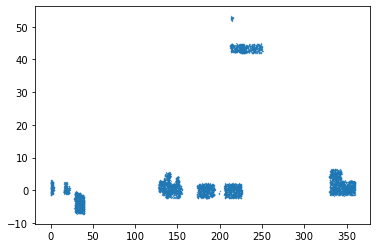

In [15]:
plt.scatter(masscut['ra'],masscut['dec'],s =0.1)

# select central

In [22]:
def convert_sphere_to_cart(RA, DEC, comoving_distance):
    coord = SkyCoord(ra=RA*u.degree,dec=DEC*u.degree,distance=comoving_distance*u.Mpc)
    cart_coord = np.zeros((len(RA), 3))
    cart_coord[:,0] = coord.cartesian.x.value
    cart_coord[:,1] = coord.cartesian.y.value
    cart_coord[:,2] = coord.cartesian.z.value
    return(cart_coord)


def find_central(i,index,mass,coord):
    mass_t = mass[index]
    s = coord[index]-coord[i]
    l = (coord[index]+coord[i])/2
    pi = np.abs(np.sum(s*l,axis=1))/np.sqrt(np.sum(l**2,axis=1))
    s2 = np.sum(s**2,axis =1)
    rp = np.sqrt(s2-pi**2)
    mass_sat = mass_t[(rp<1.0)&(pi<15)]
    if mass[i] >= np.max(mass_sat):
        return True
    else:
        return False

In [23]:
ra_temp = zcut['ra']
dec_temp = zcut['dec']
comdis = cosmo.comoving_distance(zcut['Z'])*cosmo.h
mass_temp = zcut['mass']

In [24]:
pos = np.zeros((len(ra_temp),3))
pos = convert_sphere_to_cart(ra_temp,dec_temp,comdis.value)

tree = cKDTree(pos)
index = tree.query_ball_point(pos,np.sqrt(1.5**2+15**2))
temp = np.empty((len(ra_temp)),dtype = np.bool_)
for i in range(len(ra_temp)):
    temp[i] = find_central(i,index[i],mass_temp,pos)

In [25]:
central = zcut[temp]

In [26]:
central    #6948

ra,dec,Z,mass,skymap_id
,,,solMass,
float64,float64,float32,float64,int32
146.62280014534682,-0.9513623461346574,0.37124884,11.404340511077422,93250403
147.0897033749402,-0.2664923379423015,0.3834088,11.344606775963062,93250207
146.1435840854538,-0.7416246447641355,0.20388976,11.459607260430733,93250704
146.69354971525206,-0.38657089210627266,0.45933712,11.318750967765796,93250406
145.81813010631708,-0.8789469627291188,0.20464495,11.341613829094785,93240103
146.47703208990782,0.0773967893530347,0.4418353,11.476273249069413,95680500
146.19245664184376,-0.5082879848299192,0.3693364,11.558564588991851,93250705
145.6141873873411,-0.8657527522340117,0.3458382,11.315295826628244,93240203


In [27]:
Table(central).write("./lowz_central_bayes.fits",overwrite = True)

In [1]:
pwd

'/home/yunzheng/PAC/code/lowz_new'

In [28]:
np.min(central['Z'])

0.20005344

In [29]:
np.max(central['Z'])

0.49990034

In [30]:
np.min(central['mass'])

11.30002049393963

In [31]:
np.max(central['mass'])

12.069514902894156

In [32]:
massbin = [11.3,11.5,11.7,11.9]
for i in range(len(massbin)-1):
    mstar = (central['mass'])
    print(len(mstar[(mstar<=massbin[i+1])&(mstar>=massbin[i])]))

5909
958
75


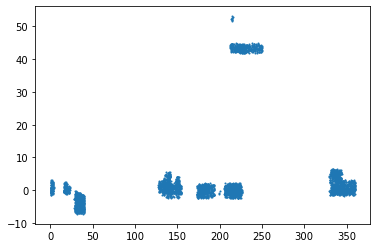

In [98]:
plt.scatter(central['ra'],central['dec'],s= 01.1)